# SIT742: Modern Data Science
**(Module: Big Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)


Prepared by **SIT742 Teaching Team**

---


## Session 3X: Advanced Data wrangling

In this session, we will learn how to use Python Packages to do the data wrangling tasks on the data and files.



### Content


1. `Pandas` Basics

2. Loading `CSV` Data

3. Data Extraction through `Pandas`

4. Data Wrangling using python and also other libraries.



**Note**: The data available on those service might be changing, so you need to adjust the code to accommodate those changes.

---

In [2]:
# Load the pandas library
import pandas as pd

## Step 1 inspect raw data

Looking at the raw data, is there anything you could find which is not quite right?

In [3]:
# load data
df = pd.read_csv('AirCrashes.csv') # df is a dataframe, confirm with: type(df)
df.shape

(927, 1)

In [4]:
df.head(20)

,Incident American Airlines Flight 11 involving a Boeing 767-223ER in 2001
Casualties,Extremely High
Total Dead,1692
Crew,11
Passengers,81
Ground,1600
Notes,No survivors
Type,INH
Reason,Attack
Location,New York - New York - US
Country,US


Some points that we could see:


1.   The data's header is not correct
2.   The actual content in each column does not make sense -- different information mixed into one column.
3.   Every 15 rows, similar pattern happens
4.   There are some NaNs in the data







What if the data is read as txt?

In [19]:
with open('AirCrashes.csv','r') as infile:
    text = infile.read()
# Print the first 680 characters from txt file
print(text[0:680])


Incident American Airlines Flight 11 involving a Boeing 767-223ER in 2001
Casualties,Extremely High
Total Dead,1692
Crew,11
Passengers,81
Ground,1600
Notes,No survivors
Type,INH
Reason,Attack
Location,New York - New York - US
Country,US
Phase,ENR
Date,2001-09-11
Latitude,40.7143528
Longitude,-74.0059731
Circumstances,Good Visibility by Day

Incident United Airlines Flight 175 involving a Boeing 767-222 in 2001
Casualties,Extremely High
Total Dead,965
Crew,9
Passengers,56
Ground,900
Notes,No survivors
Type,INH
Reason,Attack
Location,New York - New York - US
Country,USA
Phase,ENR
Date,2001-09-11
Latitude,40.7143528
Longitude,-74.0059731
Circumstances,Good Visibility by Day


Now can you see the pattern in the raw data?
Can you summarize the pattern?

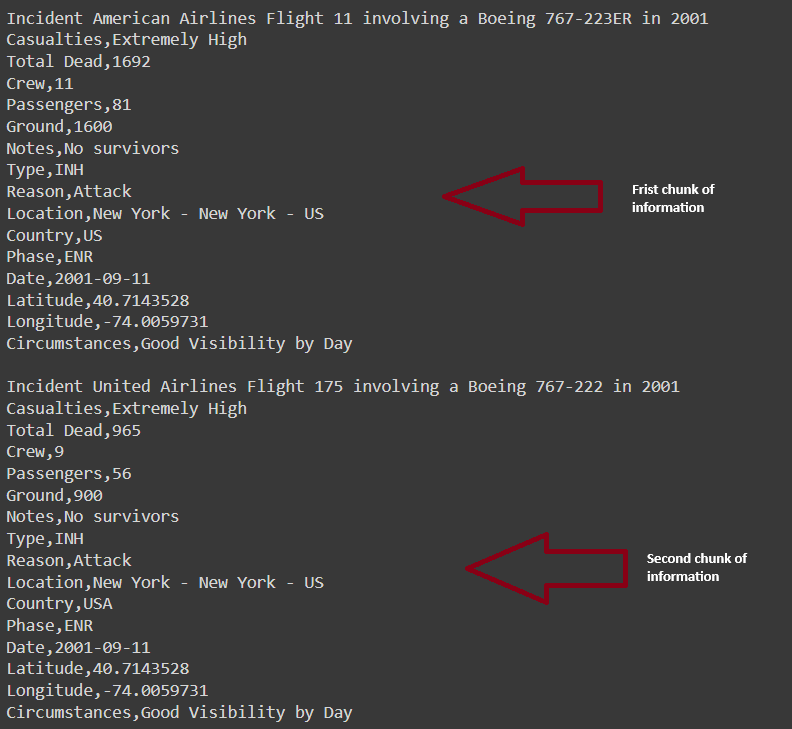

sumamrized pattern:


1.   Directly read raw data in csv is not appropriate
1.   The data is gathered by multiple chunks of information
2.   Each chunk will have its first line as description of the aircrash
2.   There is a empty line between two different chunks of information
1.   There are total 15 features to detail each aircrash.
2.   Each feature has consistent format cross all the chunks.
3. The data seems to be comma delimited, however with missing commas after 'Incident' in the leading row for observations.

By noting those patterns, do you have a idea to do data wrangling for
transforming the current aircrash.csv to aircrash_fixed.csv with a better readibility and format?

For example:

1.   each feature could be a seperate column;
2.   each row is an individual aircrash case;
1.   Description of the aircrash will be a seperate column;
2.   Given correct format on each of the column (date / numerical / str)














## Solution for wrangling the data

We will make changes to the raw data file and save it to a file (readable via pandas) by read each line and:

1. add comma after "Incident",
2. remove blank lines, and
2. save the file to 'AirCrashes_fixed.csv'

In [20]:
with open('AirCrashes.csv','r') as infile:
    with open('AirCrashes_fixed.csv','a') as outfile: # somewhere to write output to.
        text = infile.read()
        text = text.split('\n') # create a list to iterate over
        for line in text:
            if line == '': continue # deal with the blank lines
            if line.startswith('Incident'):
                line = line.replace('Incident','Incident,') # add the comma after 'Incident' column header
            print(line + '\n\r',file=outfile) #create a new csv with newline and carrige return characters

Now we read the new crated aircrash_fix.csv filer to pandas.

In [92]:
data = pd.read_csv('AirCrashes_fixed.csv')
data.head(20)

,Incident,American Airlines Flight 11 involving a Boeing 767-223ER in 2001
0,Casualties,Extremely High
1,Total Dead,1692
2,Crew,11
3,Passengers,81
4,Ground,1600
5,Notes,No survivors
6,Type,INH
7,Reason,Attack
8,Location,New York - New York - US
9,Country,US


Ok, it is still not quite right, but it is not far to achieve.
What to do for next?


1.   The feature and incidient are repeated every 16 rows, we need to divide it
2.   If we transpose the current data, then each feature will be a column
1.   We need to append each of the transposed line vertically as a new dataset
2.   Format the column with correct data format.





In [88]:
# read data in to chunks and chunky_data is not a dataframe now
# the chunky_data is a text file reader object
chunky_data = pd.read_csv('AirCrashes_fixed.csv',header = None,iterator=True,chunksize=16)

In [89]:
temp_df = []
for chunk in chunky_data:
    # transponse chunk and save the second row (the row containing values not header) to "row"
    row = chunk.T.iloc[1].values
    #print(row.values)
    # append a "row" to the temp list
    temp_df.append(row)
# given the list of list to dataframe with 16 columns
# why 16 columns? 15 features + incident description
master = pd.DataFrame(temp_df)

In [91]:
master.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,American Airlines Flight 11 involving a Boein...,Extremely High,1692,11,81,1600,No survivors,INH,Attack,New York - New York - US,US,ENR,2001-09-11,40.7143528,-74.0059731,Good Visibility by Day
1,United Airlines Flight 175 involving a Boeing...,Extremely High,965,9,56,900,No survivors,INH,Attack,New York - New York - US,USA,ENR,2001-09-11,40.7143528,-74.0059731,Good Visibility by Day
2,Pan Am Flight 1736 and KLM Flight 4805 involv...,Extremely High,583,23,560,0,Some survivors,COM,Accident,Tenerife - Spain,Spain,TOF,1977-03-27,28.2915637,-16.6291304,Bad Visibility by Day
3,Japan Airlines Flight 123 involving a Beoing ...,Extremely High,520,15,505,0,Some survivors,COM,Accident,Ueno - Japan,Japan,ENR,1985-08-12,35.7089461,139.7742683,Bad Visibility by Night
4,Saudi Arabian Flight 763 and involving a Boei...,Extremely High,349,33,316,0,No survivors,,Accident,Charkhi Dadri - India,India,ENR,1996-11-12,28.6,76.2667,Bad Visibility by Night


Yeahh! not far, the current master dataframe does not have head, let's add the header!

In [102]:
column_headers = data.iloc[:,0].unique().tolist() # Get the data again
column_headers

['Casualties',
 'Total Dead',
 'Crew',
 'Passengers',
 'Ground',
 'Notes',
 'Type',
 'Reason',
 'Location',
 'Country',
 'Phase',
 'Date',
 'Latitude',
 'Longitude',
 'Circumstances',
 'Incident']

Be careful, the incident in master dataframe is in the first column, not last.

In [104]:
# why we could do the list + list?
new_header = ['Incident']+column_headers[:-1]
new_header

['Incident',
 'Casualties',
 'Total Dead',
 'Crew',
 'Passengers',
 'Ground',
 'Notes',
 'Type',
 'Reason',
 'Location',
 'Country',
 'Phase',
 'Date',
 'Latitude',
 'Longitude',
 'Circumstances']

In [105]:
master.columns = new_header # We supply it with a list of the same length
master.head() #done!

,Incident,Casualties,Total Dead,Crew,Passengers,Ground,Notes,Type,Reason,Location,Country,Phase,Date,Latitude,Longitude,Circumstances
0,American Airlines Flight 11 involving a Boein...,Extremely High,1692,11,81,1600,No survivors,INH,Attack,New York - New York - US,US,ENR,2001-09-11,40.7143528,-74.0059731,Good Visibility by Day
1,United Airlines Flight 175 involving a Boeing...,Extremely High,965,9,56,900,No survivors,INH,Attack,New York - New York - US,USA,ENR,2001-09-11,40.7143528,-74.0059731,Good Visibility by Day
2,Pan Am Flight 1736 and KLM Flight 4805 involv...,Extremely High,583,23,560,0,Some survivors,COM,Accident,Tenerife - Spain,Spain,TOF,1977-03-27,28.2915637,-16.6291304,Bad Visibility by Day
3,Japan Airlines Flight 123 involving a Beoing ...,Extremely High,520,15,505,0,Some survivors,COM,Accident,Ueno - Japan,Japan,ENR,1985-08-12,35.7089461,139.7742683,Bad Visibility by Night
4,Saudi Arabian Flight 763 and involving a Boei...,Extremely High,349,33,316,0,No survivors,,Accident,Charkhi Dadri - India,India,ENR,1996-11-12,28.6,76.2667,Bad Visibility by Night


Now let's look at the data type

In [106]:
master.dtypes

Incident         object
Casualties       object
Total Dead       object
Crew             object
Passengers       object
Ground           object
Notes            object
Type             object
Reason           object
Location         object
Country          object
Phase            object
Date             object
Latitude         object
Longitude        object
Circumstances    object
dtype: object

ok, we need to convert some of them to be numerical or date?

For example:

1.   Crew -- Int64
2.   Passengers -- Int64
1.   Ground -- Int64
1.   Total Dead -- Int64
2.   Latitude -- float64
2.   Longitude -- float64

Date should be in "date format" as well





In [112]:
# Let's first create numerical format dataframe
master_num = master[['Total Dead','Crew','Passengers','Ground','Latitude','Longitude']].apply(pd.to_numeric)
master_num.dtypes

Total Dead      int64
Crew          float64
Passengers      int64
Ground          int64
Latitude      float64
Longitude     float64
dtype: object

In [128]:
# In case some of the '-' under date column has space, let's first extract the yyyymmdd out of the date string
import re
master['Date_numerical'] = master['Date'].apply(lambda x:int(re.sub('[^0-9]', '', x)))

In [141]:
master['Date_numerical'].shape

(58,)

In [146]:
# let's find out the common pattern on Date_numerical, usually yyyy is fine, but we need to know whether it
# is mmdd or ddmm or it is mixed
for x in range(master['Date_numerical'].shape[0]):
  if int(str(master['Date_numerical'].iloc[x])[4:6]) > 12:
    print(str(master['Date_numerical'].iloc[x])+' is yyyyddmm'+' at index'+' '+str(x))
  else:
    pass



19891909 is yyyyddmm at index 47


In [147]:
# Ok, one of the row has yyyyddmm, let's change it back
# what about multiple rows has yyyyddmm? change it in a batch

master['Date_numerical'].iloc[47] = 19890919

In [148]:
# convert yyyymmdd to yyyy-mm-dd
master['Date_conv'] = master['Date_numerical'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d',errors='coerce'))

In [149]:
# is there any failure of the date converting?
master['Date_conv']

0    2001-09-11
1    2001-09-11
2    1977-03-27
3    1985-08-12
4    1996-11-12
5    1974-03-03
6    1985-06-23
7    1980-08-19
8    1988-07-03
9    2003-02-19
10   1979-05-25
11   1988-12-21
12   1983-09-01
13   2001-11-12
14   1994-04-26
15   1991-07-11
16   1979-11-28
17   1985-12-12
18   1996-01-08
19   1997-09-26
20   1996-07-17
21   1998-09-02
22   2009-06-01
23   1997-08-06
24   2002-05-25
25   1991-05-26
26   1999-10-31
27   1978-01-01
28   1998-02-16
29   1985-07-10
30   2007-07-17
31   1974-12-04
32   2001-09-11
33   1996-02-06
34   1975-08-03
35   1987-05-09
36   1978-11-15
37   1983-11-27
38   1981-12-01
39   1984-10-11
40   1979-08-11
41   1976-09-10
42   1989-06-07
43   1973-01-22
44   1972-10-13
45   1989-09-03
46   2006-08-22
47   1989-09-19
48   2000-01-30
49   2009-07-15
50   1992-09-28
51   1986-03-31
52   1890-07-08
53   2012-06-03
54   1971-07-30
55   2005-08-16
56   1984-06-06
57   1995-12-20
Name: Date_conv, dtype: datetime64[ns]

In [160]:
# All done! let's reform the dataframe and save it to a readable csv!
# But we need to find out the str columns which we did not change
column_str = [x for x in new_header if x not in master_num.columns and x != 'Date']

In [166]:
# Now let's reform the dataframe
master_final = pd.concat([master[column_str],master_num,master[['Date_conv']]],axis=1)
master_final.head(5)

,Incident,Casualties,Notes,Type,Reason,...,Passengers,Ground,Latitude,Longitude,Date_conv
0,American Airlines Flight 11 involving a Boein...,Extremely High,No survivors,INH,Attack,...,81,1600,40.714353,-74.005973,2001-09-11
1,United Airlines Flight 175 involving a Boeing...,Extremely High,No survivors,INH,Attack,...,56,900,40.714353,-74.005973,2001-09-11
2,Pan Am Flight 1736 and KLM Flight 4805 involv...,Extremely High,Some survivors,COM,Accident,...,560,0,28.291564,-16.629130,1977-03-27
3,Japan Airlines Flight 123 involving a Beoing ...,Extremely High,Some survivors,COM,Accident,...,505,0,35.708946,139.774268,1985-08-12
4,Saudi Arabian Flight 763 and involving a Boei...,Extremely High,No survivors,,Accident,...,316,0,28.600000,76.266700,1996-11-12


We achieved our data wrangling goal on this dataset, but could you find any other issues?